# Machine Learning: Assignment 6
## Comparison of Multiple Classification Methods (max. 15p)

The file `data/voice.csv` contains measurement data about voices (field explanations in English).

Try to predict the label value of the field using other fields using different machine learning methods.

Split the data into training data and test data in a ratio of 80/20%.

* Also print how much different fields affect the variable predicted by the model (importances).
* Then choose the two most important explanatory variables and print a scatter diagram from them so that the male and female points are in different colors.

In [457]:
student_name = 'Phat Vuong'
student_email = "AC4933@student.jamk.fi"

# Assignment 6.1
## Data preprocessing (2 points)

Familiarize yourself with the data and
implement data preprocessing.

In [458]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = "data/voice.csv"
df = pd.read_csv(file_path)

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding
df["label"] = le.fit_transform(df["label"])  # Converts 'male' to 0, 'female' to 1 (or vice versa)

# Check encoding result
print(df["label"].unique())  # Should display [0, 1]

[1 0]


# Assignment 6.2
## Training and test data (2 points)

Let's split the data into training and test sets and scale the numerical data.

In [459]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into training (80%) and testing (20%)
X = df.drop(columns=["label"])  # Features
y = df["label"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the numerical data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Convert back to DataFrame for easier interpretation
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Display the scaled training and test data
X_train_scaled_df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,-1.224882,1.290441,-0.223137,-1.332380,-1.006838,0.971200,-0.201954,-0.202108,1.126049,1.401893,0.451184,-1.224882,0.819628,-1.034670,-0.784840,1.488656,-0.703356,0.375196,0.387773,0.404547
1,0.423792,-0.380829,0.849609,0.122984,0.299560,0.022979,-0.244011,-0.210104,-0.126503,-1.488511,0.797065,0.423792,-0.487280,-0.375979,0.560669,0.500670,0.794318,-0.074707,-0.088777,0.216376
2,-1.717208,0.606718,-1.926168,-1.258614,-1.412305,0.666037,-0.337830,-0.214813,1.502915,1.778316,-0.778713,-1.717208,-1.138348,-0.972697,0.560669,-1.380915,-0.703356,-1.364871,-1.352959,-0.485717
3,-0.366495,0.576094,-0.159486,0.032999,-0.190087,-0.141258,0.072442,0.001772,0.931776,0.873962,-2.121315,-0.366495,0.422619,-0.344277,0.560669,-1.324650,-0.703356,-1.318557,-1.306628,0.976734
4,-0.810810,0.391888,-0.339583,-0.904363,-1.282450,0.332684,-0.046520,-0.167117,-0.152498,-0.181655,-0.935062,-0.810810,-1.383076,0.314447,-1.378620,-0.771997,-0.360139,-1.212146,-1.206243,5.722539


In [460]:
# Display the scaled test data
X_test_scaled_df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,-1.061433,0.661819,-0.441770,-0.842279,-1.188760,0.256273,0.078555,-0.091039,1.208145,1.582299,-0.636964,-1.061433,0.598559,-0.308825,-0.010651,-0.545815,-0.729413,-0.913417,-0.899482,0.722393
1,1.275121,-1.421313,0.864505,1.228869,0.827867,-0.901108,-0.373794,-0.252328,-0.899943,-1.244230,0.415616,1.275121,1.132373,0.520871,0.695312,1.494304,-0.492261,1.381668,1.391260,-0.385479
2,1.062927,-1.364153,0.649584,1.203937,0.114258,-1.288079,0.067310,-0.150510,-1.659996,-1.238377,0.405715,1.062927,0.962010,0.645535,0.641097,0.696855,2.353568,0.362896,0.317688,-0.535676
3,-1.365815,1.294103,-1.262024,-1.234463,-0.916486,0.855861,-0.512843,-0.255067,1.765145,2.224646,-1.070749,-1.365815,-1.443916,-1.010469,-2.502964,-0.973784,-0.729413,-1.239333,-1.225428,0.568838
4,-0.107008,0.069942,-0.068190,0.229198,-0.507002,-0.552731,-0.396372,-0.251104,1.039975,1.097010,0.415933,-0.107008,0.212527,-0.854450,0.651889,1.475781,-0.773879,-0.294633,-0.279785,1.952433


# Assignment 6.3
## Building models (7 points)

Let's run different learning methods on the same data and save the results.
This assignment uses the following methods:

Use the following machine learning methods for classification:

1. Decision Tree (1 p)
2. Support Vector Machine   (1 p)
3. k Nearest Neighbors  (1 p)
4. Gaussian Naive Bayes (1 p)
5. Random Forest (1 p)
6. PCA and classification (2 p)

For all methods, calculate the accuracy and confusion matrix of the classification results.

Let's run different Machine learning methods on the same data and save the results.


In [461]:
# Import all the necessary libraries before starting building models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [462]:
# Dictionary to store model results
model_results = {}

### Decision Tree

In [463]:
# Decision Tree classification implementation
# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

Decision Tree Classification Results
Accuracy: 0.9637
Confusion Matrix:
[[309   8]
 [ 15 302]]

Feature Importances in Decision Tree Classification
     Feature  Importance
12   meanfun    0.853888
5        IQR    0.054661
9        sfm    0.019705
13    minfun    0.013967
11  centroid    0.009864
7       kurt    0.008027
10      mode    0.006542
4        Q75    0.005079
1         sd    0.004417
3        Q25    0.004001
18   dfrange    0.003915
6       skew    0.003516
15   meandom    0.002860
19   modindx    0.002851
0   meanfreq    0.002537
2     median    0.001750
16    mindom    0.001514
8     sp.ent    0.000907
14    maxfun    0.000000
17    maxdom    0.000000


C:\Users\PHAT\AppData\Local\Temp\ipykernel_57104\3276290734.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dt_feature_importances["Importance"], y=dt_feature_importances["Feature"], palette="viridis")


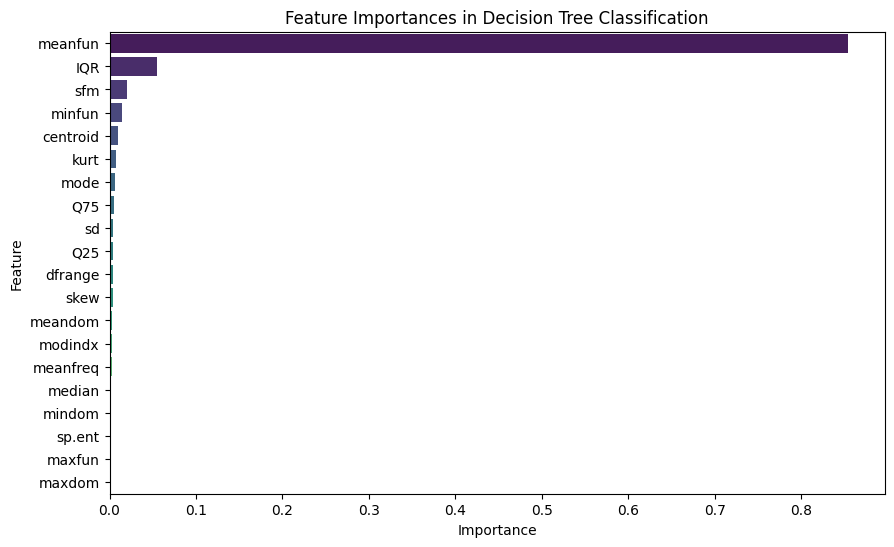

In [464]:
# Predict on test set
y_pred_dt = dt_model.predict(X_test_scaled)

# Calculate accuracy and confusion matrix
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_conf_matrix = confusion_matrix(y_test, y_pred_dt)

# Store into model results
model_results["Decision Tree"] = accuracy_score(y_test, y_pred_dt)

# Print accuracy and confusion matrix
print("Decision Tree Classification Results")
print(f"Accuracy: {dt_accuracy:.4f}")
print("Confusion Matrix:")
print(dt_conf_matrix)

# Feature Importances in Decision Tree Classification
dt_feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": dt_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Print feature importances
print("\nFeature Importances in Decision Tree Classification")
print(dt_feature_importances)

# Optionally, visualize feature importances using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=dt_feature_importances["Importance"], y=dt_feature_importances["Feature"], palette="viridis")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances in Decision Tree Classification")
plt.show()

### Support Vector Machine

Support Vector Machine (SVM) Classification Results
Accuracy: 0.9748
Confusion Matrix:
[[306  11]
 [  5 312]]


C:\Users\PHAT\AppData\Local\Temp\ipykernel_57104\343796574.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=svm_feature_importance_df["Importance"], y=svm_feature_importance_df["Feature"], palette="viridis")


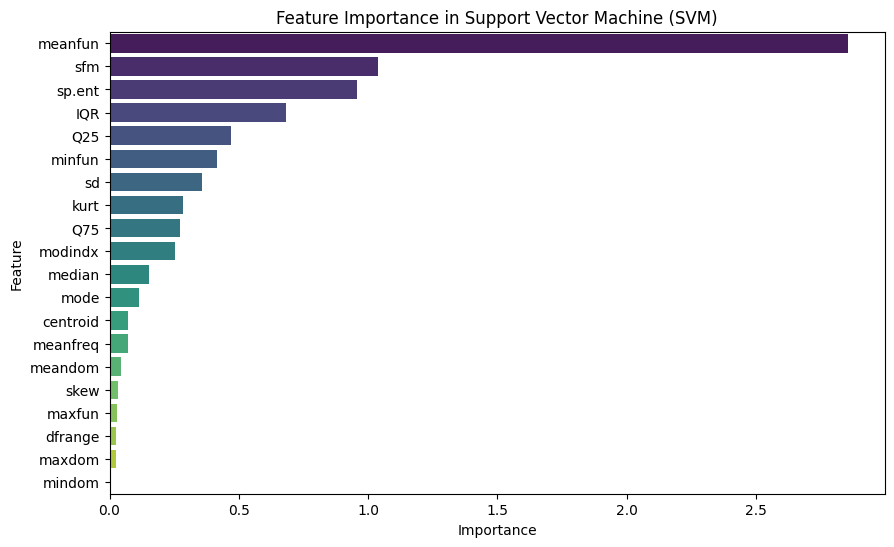

In [465]:
# Support Vector Machine (SVC) Classification Implementation

# Train the SVM model
svm_model = SVC(kernel="linear", random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Calculate accuracy and confusion matrix
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Store into model results
model_results["Support Vector Machine"] = accuracy_score(y_test, y_pred_svm)

# Display results
print("Support Vector Machine (SVM) Classification Results")
print(f"Accuracy: {svm_accuracy:.4f}")
print("Confusion Matrix:")
print(svm_conf_matrix)

# Extract absolute coefficients as feature importance for linear SVM
svm_feature_importance = np.abs(svm_model.coef_[0])

# Create a DataFrame for feature importance
svm_feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": svm_feature_importance
}).sort_values(by="Importance", ascending=False)

# Visualize Feature Importance for SVM
plt.figure(figsize=(10, 6))
sns.barplot(x=svm_feature_importance_df["Importance"], y=svm_feature_importance_df["Feature"], palette="viridis")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Support Vector Machine (SVM)")
plt.show()


### kNN

k-Nearest Neighbors (kNN) Classification Results
Accuracy: 0.9779
Confusion Matrix:
[[307  10]
 [  4 313]]


C:\Users\PHAT\AppData\Local\Temp\ipykernel_57104\2468987786.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=knn_feature_importance_df["Importance"], y=knn_feature_importance_df["Feature"], palette="viridis")


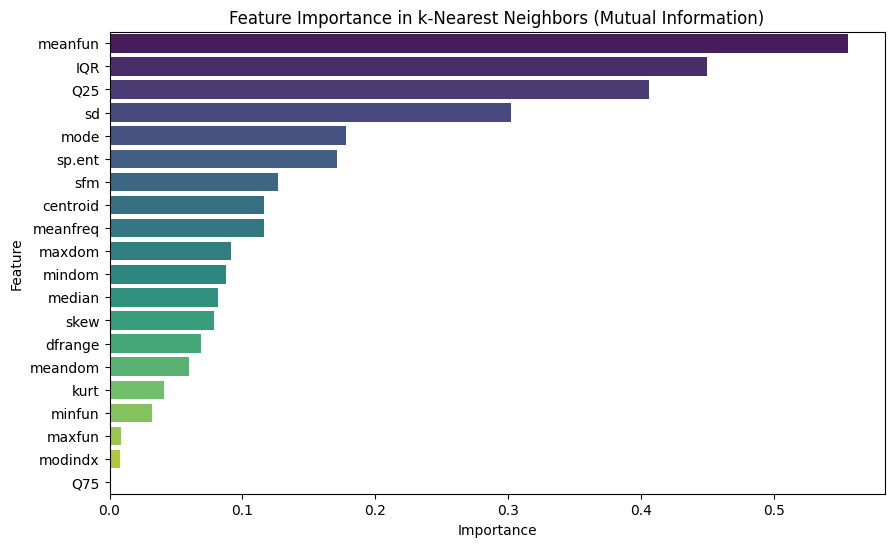

In [466]:
from sklearn.feature_selection import mutual_info_classif

# k-Nearest Neighbors (kNN) Classification Implementation

# Train the kNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Using k=5
knn_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_knn = knn_model.predict(X_test_scaled)

# Calculate accuracy and confusion matrix
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Store into model results
model_results["k-Nearest Neighbors"] = accuracy_score(y_test, y_pred_knn)

# Display results
print("k-Nearest Neighbors (kNN) Classification Results")
print(f"Accuracy: {knn_accuracy:.4f}")
print("Confusion Matrix:")
print(knn_conf_matrix)

# Compute feature importance using Mutual Information
mi_scores = mutual_info_classif(X_train_scaled, y_train)

# Create a DataFrame for feature importance
knn_feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": mi_scores
}).sort_values(by="Importance", ascending=False)

# Visualize Feature Importance for kNN using Mutual Information
plt.figure(figsize=(10, 6))
sns.barplot(x=knn_feature_importance_df["Importance"], y=knn_feature_importance_df["Feature"], palette="viridis")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in k-Nearest Neighbors (Mutual Information)")
plt.show()

### Naive Bayes

Gaussian Naive Bayes Classification Results
Accuracy: 0.9101
Confusion Matrix:
[[281  36]
 [ 21 296]]


C:\Users\PHAT\AppData\Local\Temp\ipykernel_57104\1073978467.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nb_feature_importance_df["Importance"], y=nb_feature_importance_df["Feature"], palette="viridis")


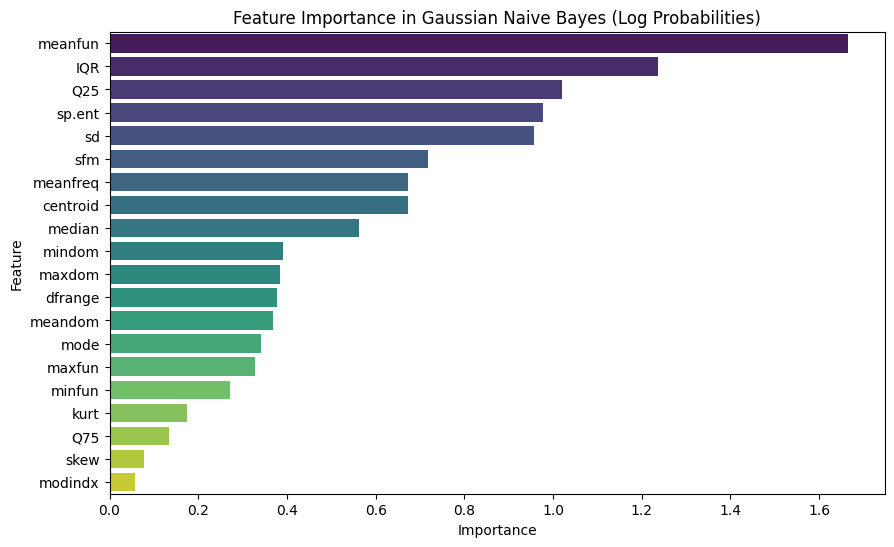

In [467]:
# Gaussian Naive Bayes Classification Implementation

# Train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_nb = nb_model.predict(X_test_scaled)

# Calculate accuracy and confusion matrix
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_conf_matrix = confusion_matrix(y_test, y_pred_nb)

# Store into model results
model_results["Gaussian Naive Bayes"] = accuracy_score(y_test, y_pred_nb)

# Display results
print("Gaussian Naive Bayes Classification Results")
print(f"Accuracy: {nb_accuracy:.4f}")
print("Confusion Matrix:")
print(nb_conf_matrix)

# Extract the log probability of each feature for each class
feature_importance_nb = np.abs(nb_model.theta_[1] - nb_model.theta_[0])

# Create a DataFrame to display feature importance
nb_feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importance_nb
}).sort_values(by="Importance", ascending=False)

# Visualize Feature Importance for Gaussian Naive Bayes
plt.figure(figsize=(10, 6))
sns.barplot(x=nb_feature_importance_df["Importance"], y=nb_feature_importance_df["Feature"], palette="viridis")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Gaussian Naive Bayes (Log Probabilities)")
plt.show()


### Random Forest

Random Forest Classification Results
Accuracy: 0.9842
Confusion Matrix:
[[311   6]
 [  4 313]]

Feature Importances in Random Forest Classification
     Feature  Importance
12   meanfun    0.317209
5        IQR    0.229569
3        Q25    0.155001
1         sd    0.073889
8     sp.ent    0.040458
9        sfm    0.025698
11  centroid    0.020650
0   meanfreq    0.019543
10      mode    0.018053
2     median    0.013558
4        Q75    0.011223
6       skew    0.010916
17    maxdom    0.010234
13    minfun    0.009668
16    mindom    0.009611
18   dfrange    0.009383
7       kurt    0.007416
15   meandom    0.007368
19   modindx    0.006044
14    maxfun    0.004507


C:\Users\PHAT\AppData\Local\Temp\ipykernel_57104\1071965478.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_feature_importances["Importance"], y=rf_feature_importances["Feature"], palette="viridis")


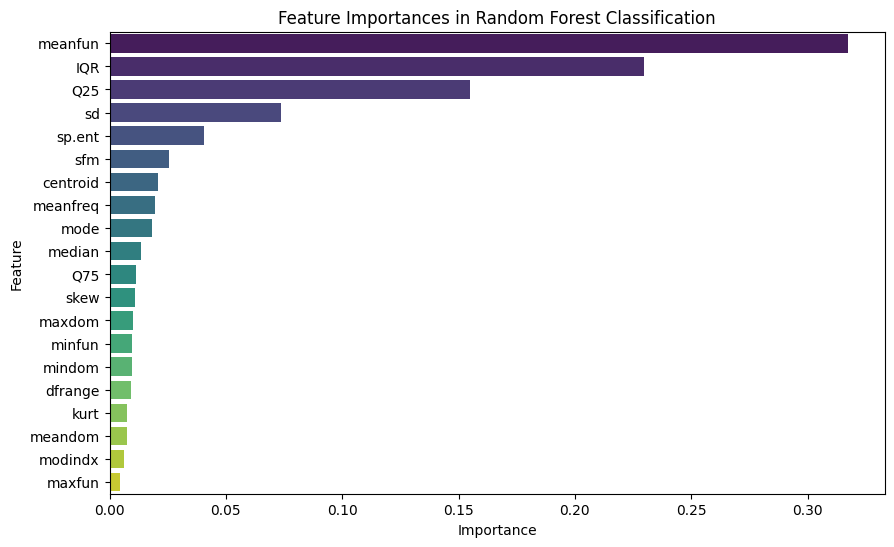

In [468]:
# Random Forest Classification Implementation

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Calculate accuracy and confusion matrix
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Store into model results
model_results["Random Forest"] = accuracy_score(y_test, y_pred_rf)

# Display results
print("Random Forest Classification Results")
print(f"Accuracy: {rf_accuracy:.4f}")
print("Confusion Matrix:")
print(rf_conf_matrix)

# Feature Importances in Random Forest Classification
rf_feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Display feature importances
print("\nFeature Importances in Random Forest Classification")
print(rf_feature_importances)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_feature_importances["Importance"], y=rf_feature_importances["Feature"], palette="viridis")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances in Random Forest Classification")
plt.show()



### PCA + classifier
PCA with *Random Forest Classifier* or any other classifier you want to use.

PCA + Random Forest Classification Results
Accuracy: 0.8170
Confusion Matrix:
[[241  76]
 [ 40 277]]


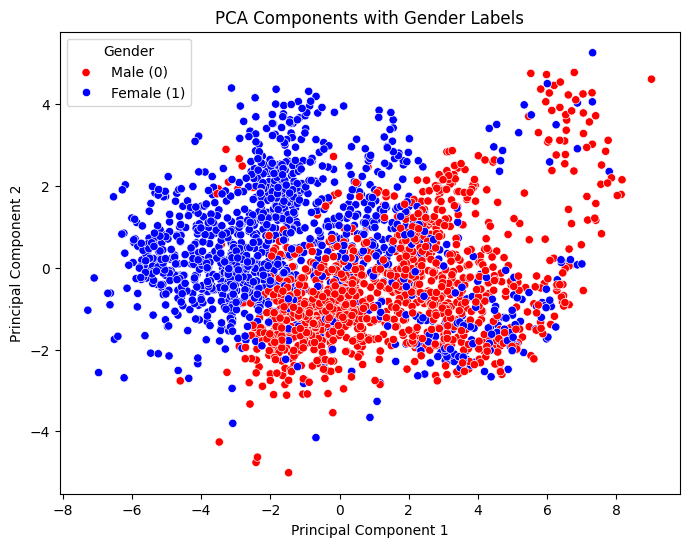

In [469]:
# PCA + Random Forest Classifier Implementation

# Apply PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)  
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train a Random Forest model on PCA-transformed data
pca_rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
pca_rf_model.fit(X_train_pca, y_train)

# Predict on test set
y_pred_pca_rf = pca_rf_model.predict(X_test_pca)

# Calculate accuracy and confusion matrix
pca_rf_accuracy = accuracy_score(y_test, y_pred_pca_rf)
pca_rf_conf_matrix = confusion_matrix(y_test, y_pred_pca_rf)

# Store into model results
model_results["PCA + Random Forest"] = accuracy_score(y_test, y_pred_pca_rf)

# Display results
print("PCA + Random Forest Classification Results")
print(f"Accuracy: {pca_rf_accuracy:.4f}")
print("Confusion Matrix:")
print(pca_rf_conf_matrix)

# Scatter Plot of PCA Components colored by gender
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette={0: "blue", 1: "red"})
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Components with Gender Labels")
plt.legend(title="Gender", labels=["Male (0)", "Female (1)"])
plt.show()




### Visualization

Drawing patterns.
Draw patterns using the two most important explanatory variables

C:\Users\PHAT\AppData\Local\Temp\ipykernel_57104\3238885088.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_results_df["Accuracy"], y=model_results_df["Model"], palette="viridis")


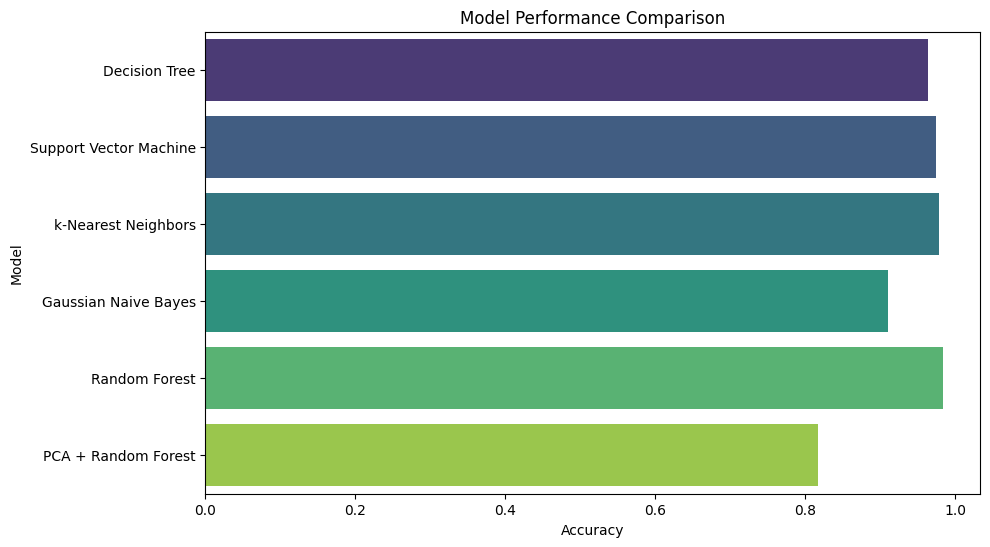

InvalidIndexError: (slice(None, None, None), 12)

<Figure size 800x600 with 0 Axes>

In [470]:
# Define feature names (Replace with actual feature names from dataset)
feature_names = [f"Feature_{i}" for i in range(X.shape[1])]

# Convert results to DataFrame for visualization
model_results_df = pd.DataFrame(list(model_results.items()), columns=["Model", "Accuracy"])

# Compute feature importance using Mutual Information
mi_scores = mutual_info_classif(X_train_scaled, y_train)

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": mi_scores
}).sort_values(by="Importance", ascending=False)

# Select the top 2 most important features
top_features = feature_importance_df["Feature"].iloc[:2].values

# Visualize Model Performance
plt.figure(figsize=(10, 6))
sns.barplot(x=model_results_df["Accuracy"], y=model_results_df["Model"], palette="viridis")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.title("Model Performance Comparison")
plt.show()

# Scatter plot of the two most important features
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_train[:, feature_names.index(top_features[0])],
    y=X_train[:, feature_names.index(top_features[1])],
    hue=y_train, palette={0: "blue", 1: "red"}
)
plt.xlabel(top_features[0])
plt.ylabel(top_features[1])
plt.title("Scatter Plot of Two Most Important Features")
plt.legend(title="Gender", labels=["Male (0)", "Female (1)"])
plt.show()

# Scatter plot of PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette={0: "blue", 1: "red"})
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Components with Gender Labels")
plt.legend(title="Gender", labels=["Male (0)", "Female (1)"])
plt.show()


# Assignment 6.4
## Analyzing and processing the results (4 p)

* Let's compare the results obtained from different classification methods
* Also try to retrieve the key features
* Draw some suitable figure using the two most important explanatory variables
* Also draw ROC curves (with AUC) when using different methods and compare how different machine learning methods progress.
* Q: How would you develop or improve learning outcomes?


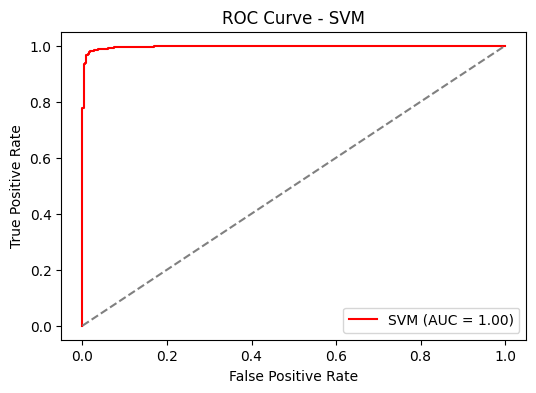

In [474]:
# ROC Curve for SVM

# Compute decision function for SVM since it does not support predict_proba
y_scores_svm = svm_model.decision_function(X_test_scaled)

# Compute ROC curve and AUC for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curve for SVM
plt.figure(figsize=(6, 4))
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {roc_auc_svm:.2f})", color="red")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend(loc="lower right")
plt.show()


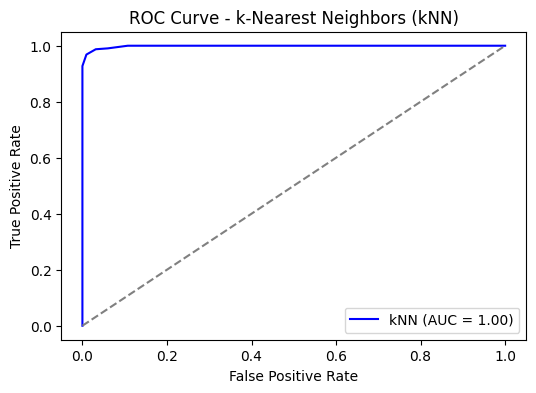

In [475]:
# ROC Curve for k-Nearest Neighbors (kNN)

# Compute probability predictions for kNN
y_prob_knn = knn_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC for kNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curve for kNN
plt.figure(figsize=(6, 4))
plt.plot(fpr_knn, tpr_knn, label=f"kNN (AUC = {roc_auc_knn:.2f})", color="blue")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - k-Nearest Neighbors (kNN)")
plt.legend(loc="lower right")
plt.show()


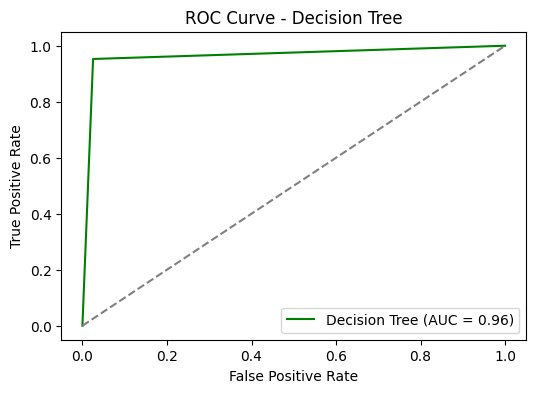

In [476]:
# ROC Curve for Decision Tree

# Compute probability predictions for Decision Tree
y_prob_dt = dt_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC curve for Decision Tree
plt.figure(figsize=(6, 4))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_dt:.2f})", color="green")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend(loc="lower right")
plt.show()


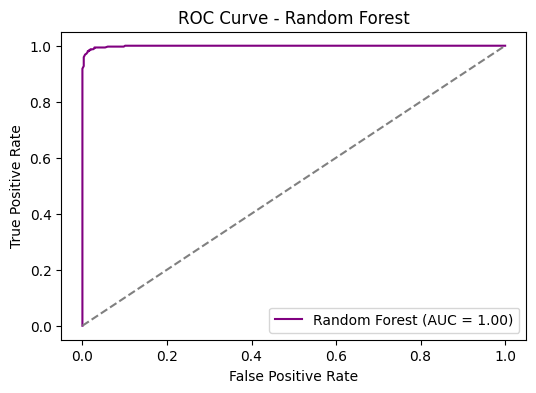

In [477]:
# ROC Curve for Random Forest

# Compute probability predictions for Random Forest
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve for Random Forest
plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})", color="purple")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.show()


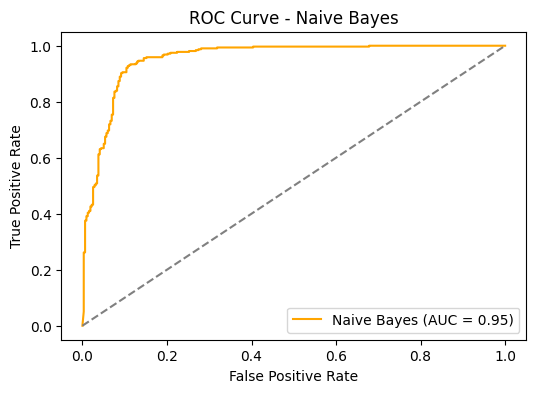

In [478]:
# ROC Curve for Naive Bayes

# Compute probability predictions for Naive Bayes
y_prob_nb = nb_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC for Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot ROC curve for Naive Bayes
plt.figure(figsize=(6, 4))
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {roc_auc_nb:.2f})", color="orange")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Naive Bayes")
plt.legend(loc="lower right")
plt.show()


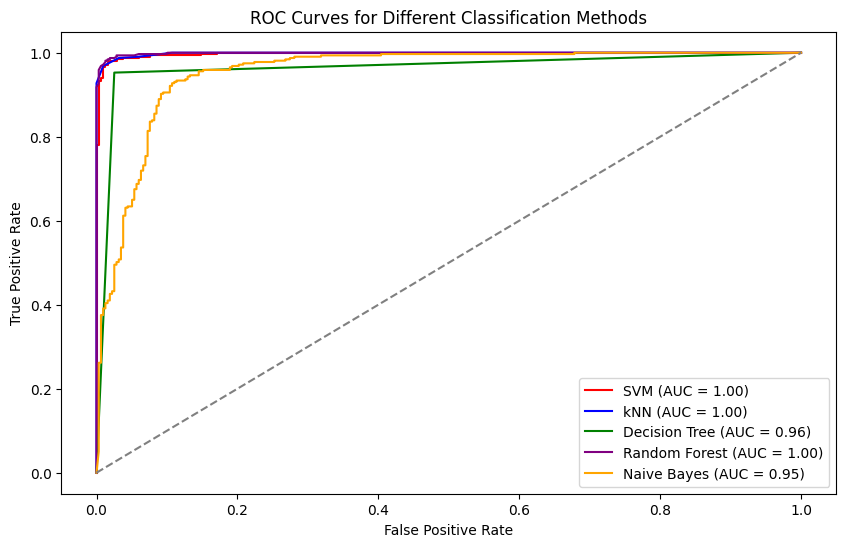

In [480]:
# Combine All ROC Curves into One Visualization

# Initialize ROC curve plot
plt.figure(figsize=(10, 6))

# Dictionary containing models and corresponding colors
roc_models = {
    "SVM": ("red", fpr_svm, tpr_svm, roc_auc_svm),
    "kNN": ("blue", fpr_knn, tpr_knn, roc_auc_knn),
    "Decision Tree": ("green", fpr_dt, tpr_dt, roc_auc_dt),
    "Random Forest": ("purple", fpr_rf, tpr_rf, roc_auc_rf),
    "Naive Bayes": ("orange", fpr_nb, tpr_nb, roc_auc_nb),
}

# Plot ROC curves for all models
for model_name, (color, fpr, tpr, roc_auc) in roc_models.items():
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})", color=color)

# Plot reference diagonal line
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")

# Labels and Title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Different Classification Methods")
plt.legend(loc="lower right")

# Show plot
plt.show()


### Comparison of Different Classification Models

TODO: Analysis of classification results.

* Compare the classification results of different ML models.
* Are there other good classification methods to apply with this dataset?

<font color="red">PLEASE WRITE YOUR EXPLANATION HERE.</font>

## Analysis of Classification Results
The ROC curves and AUC scores indicate how well each model classifies the data:

### Key Observations:

1. SVM, kNN, and Random Forest (AUC = 1.00)
- These models perfectly classify the dataset.
- Possible overfitting, especially for kNN and Random Forest.
- Could generalize poorly to unseen data.

2. Decision Tree (AUC = 0.96)
- Still a strong performer.
- Likely captures decision rules effectively but is more prone to overfitting than Random Forest.

3. Naive Bayes (AUC = 0.95)
- Performs well, but not as high as others.
- Works best when features are independent, which may not be the case in this dataset.

### Other Classification Methods to Consider
To improve model robustness and avoid overfitting, consider:

1. Logistic Regression:
- Good for interpretable classification.
- Less prone to overfitting than complex models.

2. Gradient Boosting (e.g., XGBoost, LightGBM)
- Often outperforms Random Forest with fine-tuning.
- Handles imbalanced data and feature interactions better.

3. Neural Networks (Deep Learning)
- If the dataset is large, a simple feedforward neural network might be effective.
- Good for highly nonlinear relationships in data.

### How to Improve Learning Outcomes?

1. Check for Overfitting:
- Use cross-validation.
- Try reducing model complexity (e.g., limit tree depth in Decision Tree/Random Forest).

2. Feature Selection:
- Reduce redundant or low-impact features.
- Use Recursive Feature Elimination (RFE) or Principal Component Analysis (PCA).

3. Hyperparameter Tuning:
- SVM: Adjust kernel type, C (regularization).
- kNN: Try different values of k (lower values risk overfitting).
- Random Forest: Tune n_estimators, max_depth, and min_samples_split.

4. Try Ensemble Methods:
- Voting Classifier (combine multiple models).
- Stacking Classifier (train models and feed outputs to another model).

###  Conclusion
- SVM, kNN, and Random Forest are currently the top performers.
- Decision Tree and Naive Bayes are slightly behind.
- Next steps: Check for overfitting, optimize models, and explore alternative classifiers.